In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import analysis_visualization

In [2]:
pnd_file='../data/neuro_pnd.csv'

In [3]:
neuro_pnd=pd.read_csv(pnd_file)
neuro_pnd

ID   gds_id          Drugs     gsm_id       PND  \
0       C0002395  GDS2519  CHEMBL1618018  GSM153404  1.586847   
1       C0002395  GDS2519  CHEMBL1618018  GSM153407  1.708065   
2       C0002395  GDS2519  CHEMBL1618018  GSM153408  1.679737   
3       C0002395  GDS2519  CHEMBL1618018  GSM153410  1.712728   
4       C0002395  GDS2519  CHEMBL1618018  GSM153411  1.615855   
...          ...      ...            ...        ...       ...   
115323  C0002395   GDS810   CHEMBL285802   GSM21227  1.650534   
115324  C0002395   GDS810   CHEMBL285802   GSM21228  1.717595   
115325  C0002395   GDS810   CHEMBL285802   GSM21229  1.643701   
115326  C0002395   GDS810   CHEMBL285802   GSM21230  1.603160   
115327  C0002395   GDS810   CHEMBL285802   GSM21233  1.705001   

        Closest distance  Dc_zscore Treatment  
0               0.400000  -2.555190   unknown  
1               0.400000  -2.555190   unknown  
2               0.400000  -2.555190   unknown  
3               0.400000  -2.555190   unknown  
4               0.400000  -2.555190   unknown  
...                  ...        ...       ...  
115323          0.142857  -5.294708   unknown  
115324          0.142857  -5.294708   unknown  
115325          0.142857  -5.294708   unknown  
115326          0.142857  -5.294708   unknown  
115327          0.142857  -5.294708   unknown  

[115328 rows x 8 columns]

In [4]:
filtered_pnd=analysis_visualization.filter_cd_zscore(neuro_pnd)

In [5]:
# Filter drugs to include only those with a PND smaller than the first quartile (Q1) PND of the known treatments
drugs_with_disease = neuro_pnd[(neuro_pnd['Treatment'] == 'yes')]
q1 = drugs_with_disease['PND'].quantile(0.25)
final_unknown =filtered_pnd[(filtered_pnd['PND'] <= q1)]

In [6]:
final_unknown

ID   gds_id         Drugs     gsm_id       PND  \
216     C0002395  GDS2519  CHEMBL279516  GSM153411  0.000000   
242     C0002395  GDS2519  CHEMBL279516  GSM153454  0.000000   
251     C0002395  GDS2519  CHEMBL279516  GSM153490  0.000000   
256     C0002395  GDS2519  CHEMBL279516  GSM153495  0.000000   
259     C0002395  GDS2519  CHEMBL279516  GSM153502  0.000000   
...          ...      ...           ...        ...       ...   
115278  C0002395  GDS2795  CHEMBL285802  GSM107535  1.465846   
115295  C0002395  GDS4136  CHEMBL285802  GSM697327  1.490889   
115303  C0002395  GDS4136  CHEMBL285802  GSM697335  1.460556   
115308  C0002395   GDS810  CHEMBL285802   GSM21205  1.484909   
115310  C0002395   GDS810  CHEMBL285802   GSM21207  1.388728   

        Closest distance  Dc_zscore Treatment  
216             0.000000  -2.064742   unknown  
242             0.000000  -2.064742   unknown  
251             0.000000  -2.064742   unknown  
256             0.000000  -2.064742   unknown  
259             0.000000  -2.064742   unknown  
...                  ...        ...       ...  
115278          0.142857  -5.294708   unknown  
115295          0.142857  -5.294708   unknown  
115303          0.142857  -5.294708   unknown  
115308          0.142857  -5.294708   unknown  
115310          0.142857  -5.294708   unknown  

[18396 rows x 8 columns]

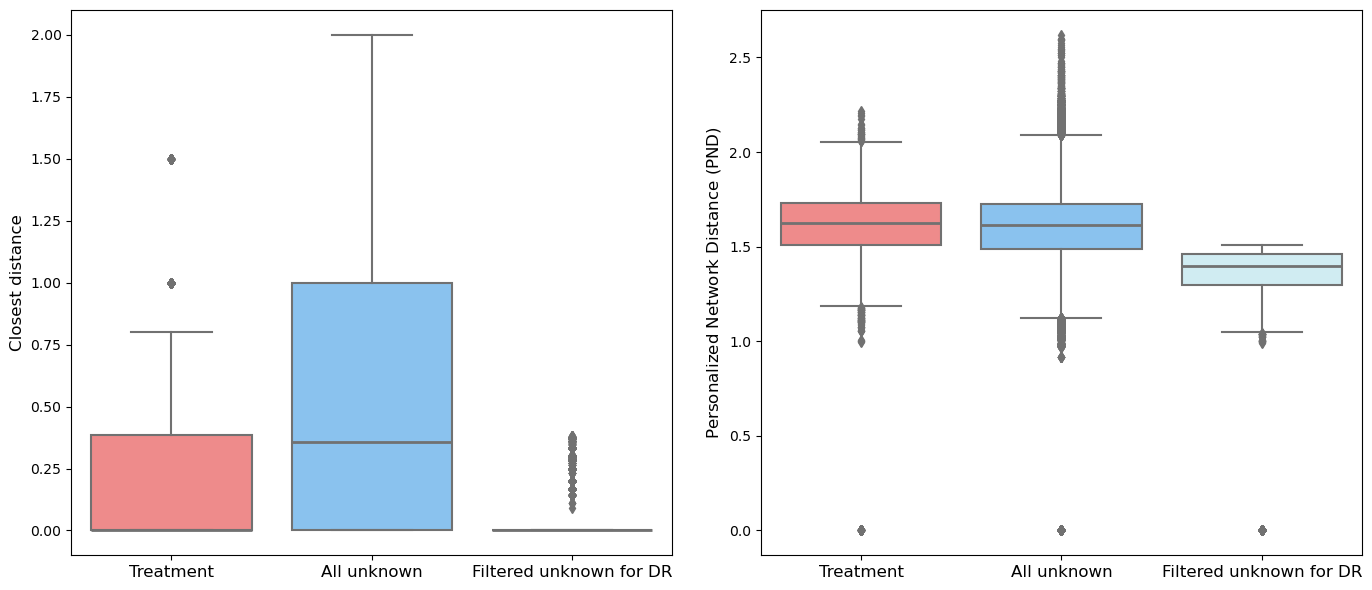

In [7]:
analysis_visualization.rep_pnd(neuro_pnd,final_unknown)

In [9]:
# Remove rows from `final_unknown` where 'Closest distance' is zero because it is not meaningful
final_unknown = final_unknown[final_unknown['Closest distance'] != 0]

# Sort the remaining rows of `final_unknown` by 'PND' in ascending order.
sorted_df = final_unknown.sort_values(by='PND')

# Extract the distinct drugs with the lowest PND values.
#We use `drop_duplicates` to keep only the first occurrence of each drug and `head(4)` to get the top 4 drugs.
#These are the drugs with the lowest PND values after excluding those with a 'Closest distance' of zero.
lowest_pnd_drugs = sorted_df.drop_duplicates(subset='Drugs').head(4)

# Convert the DataFrame of the lowest PND drugs into a list of drug names.
lowest_pnd_drugs = lowest_pnd_drugs['Drugs'].tolist()

# Output the list of drugs with the lowest PND values.
lowest_pnd_drugs

['CHEMBL282575', 'CHEMBL411', 'CHEMBL941', 'CHEMBL1336']

In [10]:
#Get 3 different gsm_id for the given list of drugs with the lowest PND values
gsm_df = analysis_visualization.get_gsm_ids_for_lowest_pnd_drugs(final_unknown, lowest_pnd_drugs, num_gsm=3)
gsm_df

ID   gds_id         Drugs     gsm_id       PND  Closest distance  \
55102  C0002395   GDS810  CHEMBL282575   GSM21207  1.037817          0.333333   
55095  C0002395  GDS4136  CHEMBL282575  GSM697335  1.088567          0.333333   
55065  C0002395  GDS2795  CHEMBL282575  GSM107525  1.095417          0.333333   
41428  C0002395   GDS810     CHEMBL411   GSM21207  1.048897          0.250000   
41421  C0002395  GDS4136     CHEMBL411  GSM697335  1.103897          0.250000   
41391  C0002395  GDS2795     CHEMBL411  GSM107525  1.106898          0.250000   
54466  C0002395   GDS810     CHEMBL941   GSM21207  1.174558          0.250000   
54429  C0002395  GDS2795     CHEMBL941  GSM107525  1.230510          0.250000   
54459  C0002395  GDS4136     CHEMBL941  GSM697335  1.234670          0.250000   
6236   C0002395   GDS810    CHEMBL1336   GSM21207  1.175647          0.300000   
6199   C0002395  GDS2795    CHEMBL1336  GSM107525  1.226749          0.300000   
6198   C0002395  GDS2795    CHEMBL1336  GSM107523  1.232494          0.300000   

       Dc_zscore Treatment  
55102  -0.668762   unknown  
55095  -0.668762   unknown  
55065  -0.668762   unknown  
41428  -1.602619   unknown  
41421  -1.602619   unknown  
41391  -1.602619   unknown  
54466  -3.851931   unknown  
54429  -3.851931   unknown  
54459  -3.851931   unknown  
6236   -3.897939   unknown  
6199   -3.897939   unknown  
6198   -3.897939   unknown

In [16]:
#read the file containing PEEPs data
peep_file='../data/genes_gds_alzheimer_filtered_dup.csv'
peeps=pd.read_csv(peep_file)
peeps

gds_id     gsm_id       id_ref gene_symbol  z_score significant  \
0      GDS2519  GSM153404  200096_s_at    ATP6V0E1   2.7422           o   
1      GDS2519  GSM153404  200097_s_at      HNRNPK   2.9833           o   
2      GDS2519  GSM153404  200801_x_at        ACTB   6.3641           o   
3      GDS2519  GSM153404  201925_s_at        CD55   3.1947           o   
4      GDS2519  GSM153404    201998_at     ST6GAL1   2.9949           o   
...        ...        ...          ...         ...      ...         ...   
16082   GDS810   GSM21233  211000_s_at       IL6ST   2.6804           o   
16083   GDS810   GSM21233  211587_x_at      CHRNA3   3.0666           o   
16084   GDS810   GSM21233  211813_x_at         DCN   3.0475           o   
16085   GDS810   GSM21233  213603_s_at        RAC2   2.6776           o   
16086   GDS810   GSM21233  215552_s_at        ESR1   3.3458           o   

       gene_id protein_id                                          gene_name  
0         8992     O15342               ATPase H+ transporting V0 subunit e1  
1         3190     P61978          heterogeneous nuclear ribonucleoprotein K  
2           60     P60709                                         actin beta  
3         1604     P08174                 CD55 molecule (Cromer blood group)  
4         6480     P15907  ST6 beta-galactoside alpha-2,6-sialyltransfera...  
...        ...        ...                                                ...  
16082     3572     P40189                    interleukin 6 signal transducer  
16083     1136     P32297     cholinergic receptor nicotinic alpha 3 subunit  
16084     1634     P07585                                            decorin  
16085     5880     P15153                          Rac family small GTPase 2  
16086     2099     P03372                                estrogen receptor 1  

[16087 rows x 9 columns]

In [29]:
#create an empty dataframe to store the final results
final_df = pd.DataFrame()

# Iterate through each unique drug in the 'Drugs' column of gsm_df
for drug in gsm_df['Drugs'].unique():
    # Get the gsm_id values for the current drug
    gsm_ids = gsm_df[gsm_df['Drugs'] == drug]['gsm_id'].unique()
    
    # Filter the peeps dataframe to include only rows with the selected gsm_id values
    filtered_peeps = peeps[peeps['gsm_id'].isin(gsm_ids)]
    
    #Find the gene symbols that are present in all the gsm_id values for the current drug
    gene_counts = filtered_peeps['gene_symbol'].value_counts()
    common_genes = gene_counts[gene_counts == len(gsm_ids)].index
    
    # Filter the dataframe to include only the common genes
    common_genes_df = filtered_peeps[filtered_peeps['gene_symbol'].isin(common_genes)]
    
    # Check if the 'significant' column has the same value for each gene_symbol across all gsm_id values
    significant_genes = common_genes_df.groupby('gene_symbol').filter(lambda x: x['significant'].nunique() == 1)
    
    # Add drug and PND information to the significant_genes dataframe
    for gsm_id in gsm_ids:
        gsm_info = gsm_df[gsm_df['gsm_id'] == gsm_id][['gds_id', 'gsm_id', 'PND']].iloc[0]
        subset = significant_genes[significant_genes['gsm_id'] == gsm_id].copy()
        subset['Drugs'] = drug
        subset['PND'] = gsm_info['PND']
        
        # Append the results to the final dataframe
        final_df = pd.concat([final_df, subset])

desired_columns = ['Drugs', 'gds_id', 'gsm_id', 'gene_symbol', 'gene_id', 'PND'] + [col for col in peeps.columns if col not in ['gds_id', 'gsm_id', 'gene_symbol', 'gene_id']]
final_df = final_df[desired_columns]
# Reset the index of the final dataframe
final_df.reset_index(drop=True, inplace=True)

In [81]:
final_df

Drugs   gds_id     gsm_id gene_symbol gene_id       PND  \
0    CHEMBL282575   GDS810   GSM21207       MMP14    4323  1.037817   
1    CHEMBL282575   GDS810   GSM21207        DNM2    1785  1.037817   
2    CHEMBL282575   GDS810   GSM21207        BMP1     649  1.037817   
3    CHEMBL282575   GDS810   GSM21207       PTPN1    5770  1.037817   
4    CHEMBL282575   GDS810   GSM21207       IGF1R    3480  1.037817   
..            ...      ...        ...         ...     ...       ...   
400    CHEMBL1336  GDS2795  GSM107523       IL23A   51561  1.232494   
401    CHEMBL1336  GDS2795  GSM107523       MELTF    4241  1.232494   
402    CHEMBL1336  GDS2795  GSM107523       ARRB1     408  1.232494   
403    CHEMBL1336  GDS2795  GSM107523         MBP    4155  1.232494   
404    CHEMBL1336  GDS2795  GSM107523       PPARA    5465  1.232494   

          id_ref  z_score significant protein_id  \
0      160020_at   4.7079           o     P50281   
1    202253_s_at   3.6879           o     P50570   
2      202701_at   5.1284           o     P13497   
3      202716_at   3.4236           o     P18031   
4      203628_at   5.6898           o     P08069   
..           ...      ...         ...        ...   
400    220054_at   3.9142           o     Q9NPF7   
401    223723_at   5.2922           o     P08582   
402    228444_at  13.8469           o     P49407   
403    228938_at   7.3370           o     P02686   
404    237142_at   4.4084           o     Q07869   

                                            gene_name  
0                          matrix metallopeptidase 14  
1                                           dynamin 2  
2                        bone morphogenetic protein 1  
3    protein tyrosine phosphatase non-receptor type 1  
4               insulin like growth factor 1 receptor  
..                                                ...  
400                      interleukin 23 subunit alpha  
401                                 melanotransferrin  
402                                   arrestin beta 1  
403                              myelin basic protein  
404  peroxisome proliferator activated receptor alpha  

[405 rows x 11 columns]

In [57]:
unique_gene_symbols = final_df.groupby('Drugs')['gene_symbol'].unique()

# Get the number of different gene symbols related to each drug
lengths_unique_gene_symbols = unique_gene_symbols.apply(len)
lengths_unique_gene_symbols

Drugs
CHEMBL1336      51
CHEMBL282575    28
CHEMBL411       28
CHEMBL941       28
Name: gene_symbol, dtype: int64

In [36]:
#Read the file containing the pathways and relation bewteen genes and pathways
gen_pat=pd.read_csv('../data/data_00_raw_data_links_gen_pat.tsv',sep='\t')
pat=pd.read_csv('../data/data_00_raw_data_nodes_pat.tsv',sep='\t')

In [78]:
#Step 1: Convert pathway_id in gen_pat and pat dataframes to string type
gen_pat['pathway_id'] = gen_pat['pathway_id'].astype(str)
pat['pathway_id'] = pat['pathway_id'].astype(str)

#Step 2: Rename columns in the pat dataframe
pat.rename(columns={'id': 'pathway_id', 'name': 'pathway_name'}, inplace=True)

#Step 3: Merge gen_pat with pat to get the complete pathway information
gen_pat_combined = pd.merge(gen_pat, pat, on='pathway_id', how='left')

#Step 4: Convert gene_id in final_df to string type if necessary
final_df['gene_id'] = final_df['gene_id'].astype(str)

#Step 5: Merge gen_pat_combined with final_df using gene_id to get pathway_id and pathway_name for each gene_id
final_df_with_pathways = pd.merge(final_df, gen_pat_combined, on='gene_id', how='left')
final_df_with_pathways

Drugs   gds_id     gsm_id gene_symbol gene_id       PND  \
0     CHEMBL282575   GDS810   GSM21207       MMP14    4323  1.037817   
1     CHEMBL282575   GDS810   GSM21207       MMP14    4323  1.037817   
2     CHEMBL282575   GDS810   GSM21207       MMP14    4323  1.037817   
3     CHEMBL282575   GDS810   GSM21207       MMP14    4323  1.037817   
4     CHEMBL282575   GDS810   GSM21207       MMP14    4323  1.037817   
...            ...      ...        ...         ...     ...       ...   
1363    CHEMBL1336  GDS2795  GSM107523       PPARA    5465  1.232494   
1364    CHEMBL1336  GDS2795  GSM107523       PPARA    5465  1.232494   
1365    CHEMBL1336  GDS2795  GSM107523       PPARA    5465  1.232494   
1366    CHEMBL1336  GDS2795  GSM107523       PPARA    5465  1.232494   
1367    CHEMBL1336  GDS2795  GSM107523       PPARA    5465  1.232494   

         id_ref  z_score significant protein_id  \
0     160020_at   4.7079           o     P50281   
1     160020_at   4.7079           o     P50281   
2     160020_at   4.7079           o     P50281   
3     160020_at   4.7079           o     P50281   
4     160020_at   4.7079           o     P50281   
...         ...      ...         ...        ...   
1363  237142_at   4.4084           o     Q07869   
1364  237142_at   4.4084           o     Q07869   
1365  237142_at   4.4084           o     Q07869   
1366  237142_at   4.4084           o     Q07869   
1367  237142_at   4.4084           o     Q07869   

                                             gene_name pathway_id  \
0                           matrix metallopeptidase 14     WP4754   
1                           matrix metallopeptidase 14     WP5283   
2                           matrix metallopeptidase 14     WP2324   
3                           matrix metallopeptidase 14      WP129   
4                           matrix metallopeptidase 14     WP3888   
...                                                ...        ...   
1363  peroxisome proliferator activated receptor alpha      WP299   
1364  peroxisome proliferator activated receptor alpha      WP236   
1365  peroxisome proliferator activated receptor alpha      WP170   
1366  peroxisome proliferator activated receptor alpha     WP1541   
1367  peroxisome proliferator activated receptor alpha     WP4396   

                                           pathway_name  
0                                        IL18 signaling  
1     Chronic hyperglycemia impairment of neuron fun...  
2                                      AGE/RAGE pathway  
3                             Matrix metalloproteinases  
4                                VEGFA-VEGFR2 signaling  
...                                                 ...  
1363  Nuclear receptors in lipid metabolism and toxi...  
1364                                       Adipogenesis  
1365                                  Nuclear receptors  
1366                                  Energy metabolism  
1367                   Nonalcoholic fatty liver disease  

[1368 rows x 13 columns]

In [52]:
#Filter by the ones without known pathways
final_df_with_pathways_filt=final_df_with_pathways.dropna(subset=['pathway_id'])
final_df_with_pathways_filt

Drugs   gds_id     gsm_id gene_symbol gene_id       PND  \
0     CHEMBL282575   GDS810   GSM21207       MMP14    4323  1.037817   
1     CHEMBL282575   GDS810   GSM21207       MMP14    4323  1.037817   
2     CHEMBL282575   GDS810   GSM21207       MMP14    4323  1.037817   
3     CHEMBL282575   GDS810   GSM21207       MMP14    4323  1.037817   
4     CHEMBL282575   GDS810   GSM21207       MMP14    4323  1.037817   
...            ...      ...        ...         ...     ...       ...   
1363    CHEMBL1336  GDS2795  GSM107523       PPARA    5465  1.232494   
1364    CHEMBL1336  GDS2795  GSM107523       PPARA    5465  1.232494   
1365    CHEMBL1336  GDS2795  GSM107523       PPARA    5465  1.232494   
1366    CHEMBL1336  GDS2795  GSM107523       PPARA    5465  1.232494   
1367    CHEMBL1336  GDS2795  GSM107523       PPARA    5465  1.232494   

         id_ref  z_score significant protein_id  \
0     160020_at   4.7079           o     P50281   
1     160020_at   4.7079           o     P50281   
2     160020_at   4.7079           o     P50281   
3     160020_at   4.7079           o     P50281   
4     160020_at   4.7079           o     P50281   
...         ...      ...         ...        ...   
1363  237142_at   4.4084           o     Q07869   
1364  237142_at   4.4084           o     Q07869   
1365  237142_at   4.4084           o     Q07869   
1366  237142_at   4.4084           o     Q07869   
1367  237142_at   4.4084           o     Q07869   

                                             gene_name pathway_id  \
0                           matrix metallopeptidase 14     WP4754   
1                           matrix metallopeptidase 14     WP5283   
2                           matrix metallopeptidase 14     WP2324   
3                           matrix metallopeptidase 14      WP129   
4                           matrix metallopeptidase 14     WP3888   
...                                                ...        ...   
1363  peroxisome proliferator activated receptor alpha      WP299   
1364  peroxisome proliferator activated receptor alpha      WP236   
1365  peroxisome proliferator activated receptor alpha      WP170   
1366  peroxisome proliferator activated receptor alpha     WP1541   
1367  peroxisome proliferator activated receptor alpha     WP4396   

                                           pathway_name  
0                                        IL18 signaling  
1     Chronic hyperglycemia impairment of neuron fun...  
2                                      AGE/RAGE pathway  
3                             Matrix metalloproteinases  
4                                VEGFA-VEGFR2 signaling  
...                                                 ...  
1363  Nuclear receptors in lipid metabolism and toxi...  
1364                                       Adipogenesis  
1365                                  Nuclear receptors  
1366                                  Energy metabolism  
1367                   Nonalcoholic fatty liver disease  

[1164 rows x 13 columns]

In [76]:
# Define the columns to specify the criteria for grouping the data.
group_columns = ['Drugs', 'gsm_id', 'gene_symbol']

#Group the final_df_with_pathways_filt DataFrame by the specified columns.
#Within each group, select the first occurrence of each combination of 'gds_id', 'pathway_id', 'pathway_name', and 'significant'.
pathways_by_group = final_df_with_pathways_filt.groupby(group_columns)[['gds_id','pathway_id', 'pathway_name','significant']].first().reset_index()

# Remove duplicate rows from `pathways_by_group` based on the combination of 'Drugs', 'gene_symbol', and 'pathway_id' to ensure that each drug-gene-pathway combination is unique in the filtered DataFrame.
pathways_by_group_filt = pathways_by_group.drop_duplicates(subset=['Drugs','gene_symbol','pathway_id'])

#Show the filtered DataFrame that now contains unique rows for each combination of 'Drugs', 'gene_symbol', and 'pathway_id'.
pathways_by_group_filt

Drugs     gsm_id gene_symbol   gds_id pathway_id  \
0    CHEMBL1336  GSM107523       ARRB1  GDS2795      WP382   
1    CHEMBL1336  GSM107523       AVPR2  GDS2795       WP24   
2    CHEMBL1336  GSM107523     BCL2L11  GDS2795      WP673   
3    CHEMBL1336  GSM107523        BMP1  GDS2795      WP236   
4    CHEMBL1336  GSM107523       CASP2  GDS2795      WP254   
..          ...        ...         ...      ...        ...   
170   CHEMBL941  GSM107525        NOS1  GDS2795     WP2447   
171   CHEMBL941  GSM107525       PPARA  GDS2795      WP299   
172   CHEMBL941  GSM107525       PTPN1  GDS2795     WP2037   
173   CHEMBL941  GSM107525       SIRT3  GDS2795     WP1541   
174   CHEMBL941  GSM107525        TBX2  GDS2795      WP304   

                                          pathway_name significant  
0                                       MAPK signaling           o  
1                                        Peptide GPCRs           o  
2                                       ErbB signaling           o  
3                                         Adipogenesis           o  
4                                            Apoptosis           o  
..                                                 ...         ...  
170                Amyotrophic lateral sclerosis (ALS)           o  
171  Nuclear receptors in lipid metabolism and toxi...           o  
172                                Prolactin signaling           o  
173                                  Energy metabolism           o  
174                             Kit receptor signaling           o  

[67 rows x 7 columns]

In [70]:
pathways_by_group_filt.to_csv('../results/dru_gene_pat_final.csv',index=False)

In [65]:
# Group the dataFrame by the Drugs column and for each drug, count the number of different gene symbols associated with it.
unique_gene_symbols_per_drug = pathways_by_group_filt.groupby('Drugs')['gene_symbol'].nunique()

#Show the count of unique gene symbols for each drug.
unique_gene_symbols_per_drug

Drugs
CHEMBL1336      28
CHEMBL282575    13
CHEMBL411       13
CHEMBL941       13
Name: gene_symbol, dtype: int64